# Implement SGD for Linear Regression

## 1. Using sklearn's SGDRegressor

In [450]:
import warnings
warnings.filterwarnings("ignore")
import sklearn
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

In [451]:
boston = load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [452]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [453]:
data = pd.DataFrame(boston.data)
data.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14


In [454]:
data['Price'] = boston.target

X = data.drop('Price', axis=1)
Y = data['Price']

In [455]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(354, 13)
(152, 13)
(354,)
(152,)


In [456]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_standardized = scaler.transform(X_train)
X_test_standardized = scaler.transform(X_test)
print(X_train_standardized.shape)
print(X_test_standardized.shape)

(354, 13)
(152, 13)


In [457]:
clf = SGDRegressor()
clf.fit(X_train_standardized, Y_train)
sgd_reg_mean_square_error = mean_squared_error(Y_test, clf.predict(X_test_standardized))

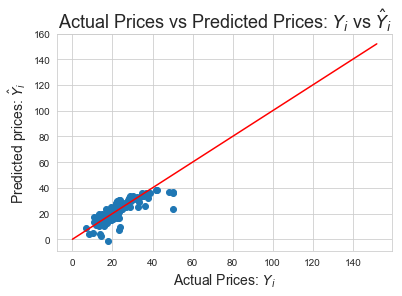

In [458]:
predictions = clf.predict(X_test_standardized)
plt.scatter(Y_test,predictions)
plt.plot([0,Y_test.shape[0]],[0,Y_test.shape[0]], 'r-')
plt.xlabel("Actual Prices: $Y_i$",size=14)
plt.ylabel("Predicted prices: $\hat{Y}_i$",size=14)
plt.title("Actual Prices vs Predicted Prices: $Y_i$ vs $\hat{Y}_i$",size=18)
plt.show()

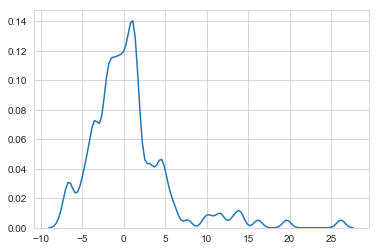

In [459]:
Y_delta = Y_test - predictions

import seaborn as sns;
sns.set_style('whitegrid')
sns.kdeplot(np.array(Y_delta), bw=0.5)
plt.show()

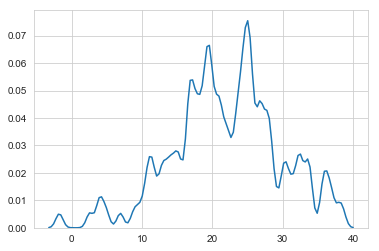

In [460]:
sns.set_style('whitegrid')
sns.kdeplot(np.array(predictions), bw=0.5)
plt.show()

In [461]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

# calculate Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE)
print("Mean Squared Error using sklearn's SGDRegressor : ", mean_squared_error(Y_test,predictions))
print("y-intercept using sklearn's SGDRegressor : ", clf.intercept_)
print("Coefficients using sklearn's SGDRegressor : ", clf.coef_)

Mean Squared Error using sklearn's SGDRegressor :  24.56950602821252
y-intercept using sklearn's SGDRegressor :  [21.94618394]
Coefficients using sklearn's SGDRegressor :  [-0.68598493  0.82829453 -0.58741826  0.71989831 -0.73076416  3.26802851
 -0.15186871 -1.81819493  0.91842005 -0.39368379 -1.98931114  1.07142594
 -3.60446096]


## 2. Manually applying SGD on Linear Regression

In [462]:
#https://github.com/premvardhan/Stochastic-Gradient-descent-in-python/blob/master/LinearRegression_on_bostan_house_price_using_SGD_reopen.ipynb

bostan = load_boston()
data = (data - data.mean())/data.std()
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,Price
0,-0.419367,0.284548,-1.286636,-0.272329,-0.144075,0.413263,-0.119895,0.140075,-0.981871,-0.665949,-1.457558,0.440616,-1.074499,0.159528
1,-0.416927,-0.487240,-0.592794,-0.272329,-0.739530,0.194082,0.366803,0.556609,-0.867024,-0.986353,-0.302794,0.440616,-0.491953,-0.101424
2,-0.416929,-0.487240,-0.592794,-0.272329,-0.739530,1.281446,-0.265549,0.556609,-0.867024,-0.986353,-0.302794,0.396035,-1.207532,1.322937
3,-0.416338,-0.487240,-1.305586,-0.272329,-0.834458,1.015298,-0.809088,1.076671,-0.752178,-1.105022,0.112920,0.415751,-1.360171,1.181589
4,-0.412074,-0.487240,-1.305586,-0.272329,-0.834458,1.227362,-0.510674,1.076671,-0.752178,-1.105022,0.112920,0.440616,-1.025487,1.486032


In [463]:
data["PRICE"] = bostan.target
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,Price,PRICE
0,-0.419367,0.284548,-1.286636,-0.272329,-0.144075,0.413263,-0.119895,0.140075,-0.981871,-0.665949,-1.457558,0.440616,-1.074499,0.159528,24.0
1,-0.416927,-0.487240,-0.592794,-0.272329,-0.739530,0.194082,0.366803,0.556609,-0.867024,-0.986353,-0.302794,0.440616,-0.491953,-0.101424,21.6
2,-0.416929,-0.487240,-0.592794,-0.272329,-0.739530,1.281446,-0.265549,0.556609,-0.867024,-0.986353,-0.302794,0.396035,-1.207532,1.322937,34.7
3,-0.416338,-0.487240,-1.305586,-0.272329,-0.834458,1.015298,-0.809088,1.076671,-0.752178,-1.105022,0.112920,0.415751,-1.360171,1.181589,33.4
4,-0.412074,-0.487240,-1.305586,-0.272329,-0.834458,1.227362,-0.510674,1.076671,-0.752178,-1.105022,0.112920,0.440616,-1.025487,1.486032,36.2


In [464]:
# Target and features
Y = data["PRICE"]
X = data.drop("PRICE", axis = 1)

In [465]:

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(354, 14) (152, 14) (354,) (152,)


In [466]:
x_train["PRICE"] = y_train
#x_test["PRICE"] = y_test

In [467]:
def cost_function(b, m, features, target):
    totalError = 0
    for i in range(0, len(features)):
        x = features
        y = target
        totalError += (y[:,i] - (np.dot(x[i] , m) + b)) ** 2
    return totalError / len(x)

In [468]:
# The total sum of squares (proportional to the variance of the data)i.e. ss_tot 
# The sum of squares of residuals, also called the residual sum of squares i.e. ss_res 
# the coefficient of determination i.e. r^2(r squared)
def r_sq_score(b, m, features, target):
    for i in range(0, len(features)):
        x = features
        y = target
        mean_y = np.mean(y)
        ss_tot = sum((y[:,i] - mean_y) ** 2)
        ss_res = sum(((y[:,i]) - (np.dot(x[i], m) + b)) ** 2)
        r2 = 1 - (ss_res / ss_tot)
    return r2

In [469]:
def gradient_decent(w0, b0, train_data, x_test, y_test, learning_rate):
    n_iter = 500
    partial_deriv_m = 0
    partial_deriv_b = 0
    cost_train = []
    cost_test = []
    for j in range(1, n_iter):
        
        # Train sample
        train_sample = train_data.sample(160)
        y = np.asmatrix(train_sample["PRICE"])
        x = np.asmatrix(train_sample.drop("PRICE", axis = 1))
        for i in range(len(x)):
            partial_deriv_m += np.dot(-2*x[i].T , (y[:,i] - np.dot(x[i] , w0) + b0))
            partial_deriv_b += -2*(y[:,i] - (np.dot(x[i] , w0) + b0))
        
        w1 = w0 - learning_rate * partial_deriv_m 
        b1 = b0 - learning_rate * partial_deriv_b
        
        if (w0==w1).all():
            #print("W0 are\n", w0)
            #print("\nW1 are\n", w1)
            #print("\n X are\n", x)
            #print("\n y are\n", y)
            break
        else:
            w0 = w1
            b0 = b1
            learning_rate = learning_rate/2
       
            
        error_train = cost_function(b0, w0, x, y)
        cost_train.append(error_train)
        error_test = cost_function(b0, w0, np.asmatrix(x_test), np.asmatrix(y_test))
        cost_test.append(error_test)
        
        #print("After {0} iteration error = {1}".format(j, error_train))
        #print("After {0} iteration error = {1}".format(j, error_test))
        
    return w0, b0, cost_train, cost_test

Coefficient: [[ 1.51576434]
 [ 0.6681907 ]
 [-0.38447539]
 [-0.03305795]
 [ 0.16993286]
 [ 2.52355234]
 [ 0.12954727]
 [-0.77078797]
 [ 1.18518109]
 [ 0.3447309 ]
 [-0.11770491]
 [ 0.42048542]
 [-1.15557312]
 [ 4.08280113]] 
 y_intercept: [[21.2671032]]


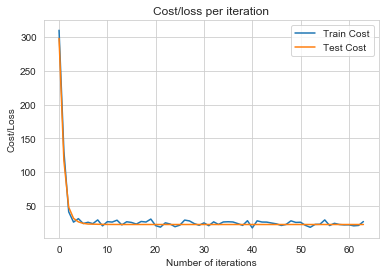

In [470]:
# Run our model
learning_rate = 0.001
w0_random = np.random.rand(14)
w0 = np.asmatrix(w0_random).T
b0 = np.random.rand()

optimal_w, optimal_b, cost_train, cost_test = gradient_decent(w0, b0, x_train, x_test, y_test, learning_rate)
manual_sgd_mean_square_error = np.squeeze(np.asarray(cost_function(optimal_b, optimal_w, np.asmatrix(x_test), np.asmatrix(y_test))))
print("Coefficient: {} \n y_intercept: {}".format(optimal_w, optimal_b))

# Plot train and test error in each iteration
plt.figure()
plt.plot(range(len(cost_train)), np.reshape(cost_train,[len(cost_train), 1]), label = "Train Cost")
plt.plot(range(len(cost_test)), np.reshape(cost_test, [len(cost_test), 1]), label = "Test Cost")
plt.title("Cost/loss per iteration")
plt.xlabel("Number of iterations")
plt.ylabel("Cost/Loss")
plt.legend()
plt.show()

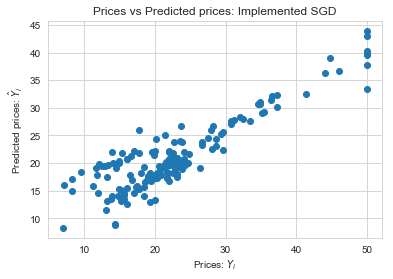

In [471]:
plt.scatter([y_test], [(np.dot(np.asmatrix(x_test), optimal_w) + optimal_b)])
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: Implemented SGD")
plt.show()

## 3. Comparison between sklearn SGD and implemented SGD in python

In [472]:

# Creating the table using PrettyTable library
from prettytable import PrettyTable

numbering = [1,2,3,4,5,6,7,8,9,10,11,12,13]
# Initializing prettytable
ptable = PrettyTable()

# Adding columns
ptable.add_column("S.NO.",numbering)
ptable.add_column("Weights of Manual SGD",np.squeeze(np.asarray(optimal_w[:13])))
ptable.add_column("Weights of Sklearn's SGD",clf.coef_)

# Printing the Table
print(ptable)
print('MSE obtained from SGDRegressor of sklearns implementation', sgd_reg_mean_square_error)
print('MSE obtained from custom implementation of SGDRegressor', manual_sgd_mean_square_error)

+-------+-----------------------+--------------------------+
| S.NO. | Weights of Manual SGD | Weights of Sklearn's SGD |
+-------+-----------------------+--------------------------+
|   1   |    1.51576433960276   |   -0.6859849290201605    |
|   2   |   0.6681906950914118  |    0.8282945313707629    |
|   3   |   -0.384475393871672  |   -0.5874182613800736    |
|   4   |  -0.03305794999224466 |    0.7198983129386275    |
|   5   |  0.16993286473350575  |   -0.7307641620518411    |
|   6   |   2.523552335726334   |    3.268028506965332     |
|   7   |  0.12954726575804512  |   -0.1518687103704755    |
|   8   |   -0.770787968438822  |   -1.8181949301732296    |
|   9   |   1.185181091121129   |    0.9184200493798684    |
|   10  |   0.3447308994740641  |   -0.39368379160878253   |
|   11  |  -0.11770491361778207 |   -1.9893111382808781    |
|   12  |  0.42048542358034174  |    1.0714259433401063    |
|   13  |  -1.1555731193171663  |   -3.6044609566121673    |
+-------+---------------